# Meta-Data - Study I
## Imports

In [1]:
# load dependencies
import seaborn as sns
import StudyI_Pentatonic_vs_Chromatic.paths as StudyI_paths
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data
studyI_GL = pd.read_pickle(StudyI_paths.processed_dir + StudyI_paths.post_exclusion_data_pickle_filename) # Study I: Post-exclusion group-level data

### Demographics

In [3]:
temp = studyI_GL

temp = temp.groupby(['sona','length','subject']).first().reset_index()

# group total subjects by length
temp = temp.groupby(['length', 'subject_gender']).count().reset_index()
# plot
# sns.catplot(y="sona", x="length", kind="bar", hue="subject_gender", data=temp)

# Print number of subjects for each melody length
print("Number of subjects per melody length:")
print(temp[['length','sona','subject_gender']])


Number of subjects per melody length:
   length  sona subject_gender
0     8.0    22         Female
1     8.0     6           Male
2    12.0    24         Female
3    12.0     4           Male
4    12.0     1          Other
5    16.0    35         Female
6    16.0     5           Male
7    16.0     1          Other


In [4]:
temp = studyI_GL
# group total subjects by length
temp = temp.groupby(['sona','length','subject']).count().reset_index()

# Get average age and range of ages for each melody length
temp = studyI_GL.groupby(['length']).agg({'subject_age': ['mean', 'min', 'max']}).reset_index()
temp.columns = ['length', 'mean', 'min', 'max']
# round to 2 decimal places
temp = temp.round(decimals=2)
print("Average age and range of ages for each melody length:")
print(temp)



Average age and range of ages for each melody length:
   length   mean   min   max
0     8.0  19.14  18.0  21.0
1    12.0  18.89  18.0  22.0
2    16.0  19.07  17.0  25.0


In [33]:
# number of subjects with 0 years of musical training 12+16 notes
temp = studyI_GL[(studyI_GL['length'] >= 12)]
temp = temp[temp['How many years of formal musical training do you have?'] == "0"]
temp = temp.groupby(['sona','length','subject']).first().reset_index()
# group total subjects by length
temp = temp.groupby(['length', 'subject_gender']).count().reset_index()

print(temp[['length','sona','subject_gender']])


   length  sona subject_gender
0    12.0    10         Female
1    12.0     2           Male
2    16.0     9         Female
3    16.0     1           Male


## Plots
### Number of subjects per any given melody length

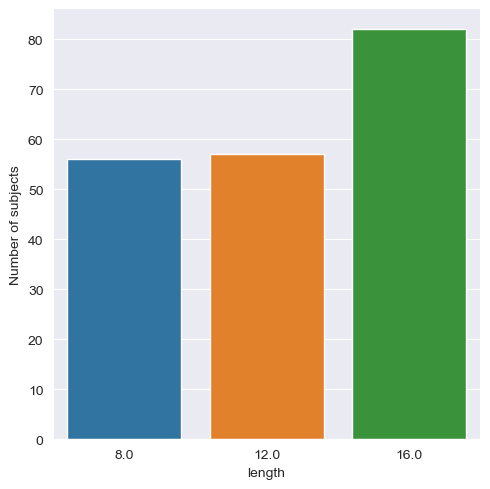

In [5]:
temp = studyI_GL.groupby(['length']).count().reset_index()
temp = temp.rename(columns={'subject':'Number of subjects'})
sns.catplot(y="Number of subjects", x="length", kind="bar", data=temp)
plt.savefig(StudyI_paths.plots_dir + "subjects_per_set.svg")

### Distribution of button presses
1st - left button
neither - middle button
2nd - right button

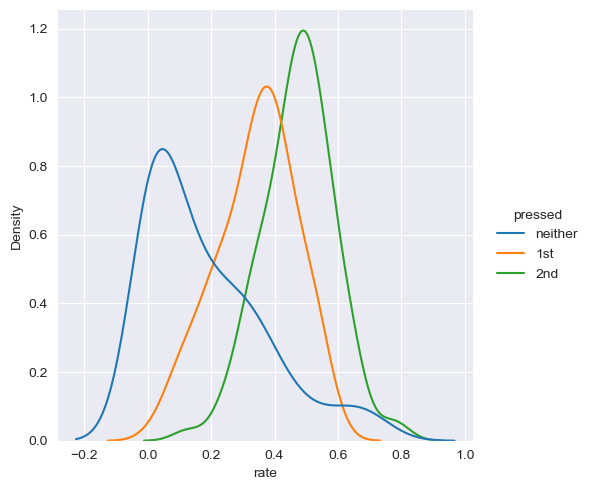

In [6]:
# Study I: Distribution of button presses
temp = studyI_GL[['subject', 'rate pressed neither (task)','rate pressed 1st (task)','rate pressed 2nd (task)']]
temp = temp.rename(columns={'rate pressed neither (task)':'neither','rate pressed 1st (task)':'1st','rate pressed 2nd (task)':'2nd'})
temp = temp.groupby('subject').mean().stack().reset_index()
temp = temp.rename(columns={'level_1':'pressed',0:'rate'})
sns.displot(data=temp, x="rate", hue="pressed",kind='kde')
plt.savefig(StudyI_paths.plots_dir + "dist_of_buttons.svg")

### Distribution of amount of "neither" presses across the task


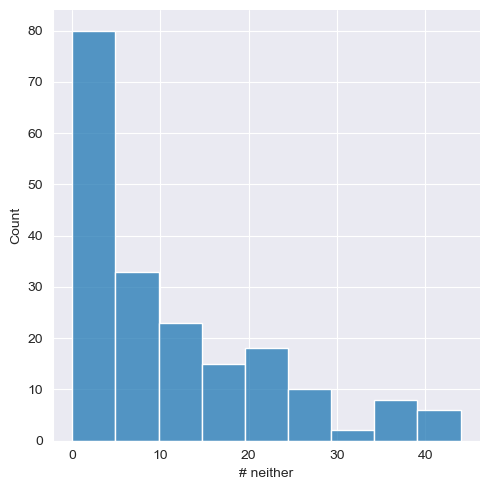

In [7]:
sns.displot(data=studyI_GL, x="# neither")
plt.savefig(StudyI_paths.plots_dir + "dist_of_neithers.svg")